# Lesson 26: Functional API

Run this notebook. It will produce a model summary and model graph. Add a second branch to the model such that your model summary is as follows: 

```
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
==================================================================================================
visible (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 61, 61, 32)   544         visible[0][0]                    
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 57, 57, 16)   1040        visible[0][0]                    
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 30, 30, 32)   0           conv1[0][0]                      
__________________________________________________________________________________________________
pool2 (MaxPooling2D)            (None, 28, 28, 16)   0           conv2[0][0]                      
__________________________________________________________________________________________________
flat1 (Flatten)                 (None, 28800)        0           pool1[0][0]                      
__________________________________________________________________________________________________
flat2 (Flatten)                 (None, 12544)        0           pool2[0][0]                      
__________________________________________________________________________________________________
merge (Concatenate)             (None, 41344)        0           flat1[0][0]                      
                                                                 flat2[0][0]                      
__________________________________________________________________________________________________
hidden1 (Dense)                 (None, 10)           413450      merge[0][0]                      
__________________________________________________________________________________________________
output (Dense)                  (None, 1)            11          hidden1[0][0]                    
==================================================================================================
Total params: 415,045
Trainable params: 415,045
Non-trainable params: 0
```

Your model's graph should like this: 

<img title="" alt="" src="https://i.imgur.com/vhBtIwB.png" />

## Single-branch network 

The code below will generate the single-branch version of the network:

In [0]:
from tensorflow.keras import Input
from tensorflow.keras import Model
from tensorflow.keras import layers 

# input layer
visible = Input(shape=(64,64,1),name='visible')

# feature extractor
conv1 = layers.Conv2D(32, kernel_size=4, activation='relu', name='conv1')(visible)
pool1 = layers.MaxPooling2D(pool_size=(2, 2), name='pool1')(conv1)
flat1 = layers.Flatten(name='flat1')(pool1)

# interpretation layer
hidden1 = layers.Dense(10, activation='relu', name='hidden1')(flat1)

# output
output = layers.Dense(1, activation='sigmoid', name='output')(hidden1)
model = Model(inputs=visible, outputs=output, name='model')

## Summary 

The following will print a summary of your network:

In [2]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
visible (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 61, 61, 32)        544       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 30, 30, 32)        0         
_________________________________________________________________
flat1 (Flatten)              (None, 28800)             0         
_________________________________________________________________
hidden1 (Dense)              (None, 10)                288010    
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 288,565
Trainable params: 288,565
Non-trainable params: 0
_______________________________________________________

## Network graph

Finally, the following block will generate the graph of your network:

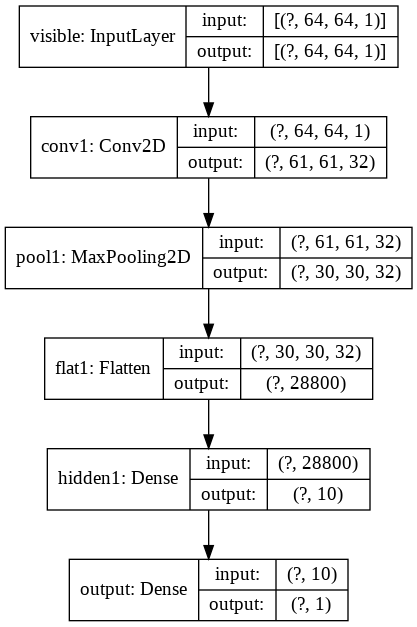

In [3]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)